In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv('Iris.csv')
df=pd.DataFrame(d)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
setosa=df[:50]
versicolor=df[50:100]
virginica=df[100:]

In [6]:
print("\n# Handling the outliers")
for i in ["PetalLengthCm", "PetalWidthCm"]:
    q1 = setosa[i].quantile(0.25)
    q2 = setosa[i].median()
    q3 = setosa[i].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    lower_outliers = setosa[i] < lower_limit
    upper_outliers = setosa[i] > upper_limit

    setosa[i] = setosa[i][~(lower_outliers)]
    setosa.fillna(value=q1,inplace=True)
    
    setosa[i] = setosa[i][~(upper_outliers)]
    setosa.fillna(value=q3,inplace=True)

for i in ["PetalLengthCm"]:
    q1 = versicolor[i].quantile(0.25)
    q2 = versicolor[i].median()
    q3 = versicolor[i].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    lower_outliers = versicolor[i] < lower_limit
    upper_outliers = versicolor[i] > upper_limit

    versicolor[i] = versicolor[i][~(lower_outliers)]
    versicolor.fillna(value=q1,inplace=True)
    
    versicolor[i] = versicolor[i][~(upper_outliers)]
    versicolor.fillna(value=q3,inplace=True)

for i in ["SepalLengthCm", "SepalWidthCm"]:
    q1 = virginica[i].quantile(0.25)
    q2 = virginica[i].median()
    q3 = virginica[i].quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    lower_outliers = virginica[i] < lower_limit
    upper_outliers = virginica[i] > upper_limit

    virginica[i] = virginica[i][~(lower_outliers)]
    virginica.fillna(value=q1,inplace=True)
    
    virginica[i] = virginica[i][~(upper_outliers)]
    virginica.fillna(value=q3,inplace=True)


# Handling the outliers


/tmp/ipykernel_4351/1073742908.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa[i] = setosa[i][~(lower_outliers)]
/tmp/ipykernel_4351/1073742908.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa.fillna(value=q1,inplace=True)
/tmp/ipykernel_4351/1073742908.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [7]:
df2=pd.concat([setosa,versicolor,virginica])

In [8]:
setosa.describe()
# ***************Iris-setosa***************

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.000000
mean,25.50000,5.00600,3.418000,1.465000,0.234000
std,14.57738,0.35249,0.381024,0.126168,0.087155
min,1.00000,4.30000,2.300000,1.200000,0.100000
25%,13.25000,4.80000,3.125000,1.400000,0.200000
50%,25.50000,5.00000,3.400000,1.500000,0.200000
75%,37.75000,5.20000,3.675000,1.556250,0.300000
max,50.00000,5.80000,4.400000,1.700000,0.400000


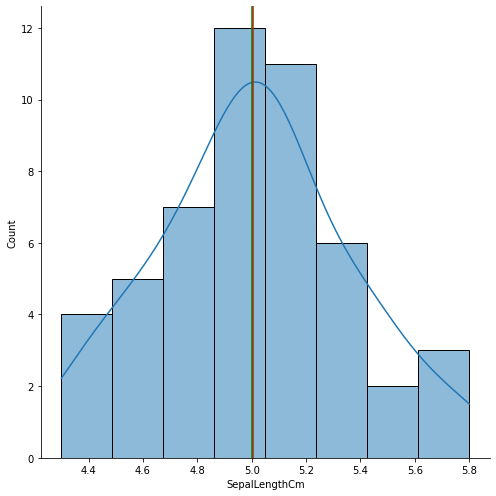

In [9]:
'''
SepalLengthCm ranges from 5 to 5.8 for iris setosa 
so 8 bins of width 0.1
the distribution is symmetric .i.e. normal curve
'''
sb.displot(data=setosa,x=setosa.SepalLengthCm,height=7,bins=8,kde=True)
plt.axvline(x=setosa.SepalLengthCm.mean(),
            color='red')
plt.axvline(x=setosa.SepalLengthCm.median(),
            color='green')

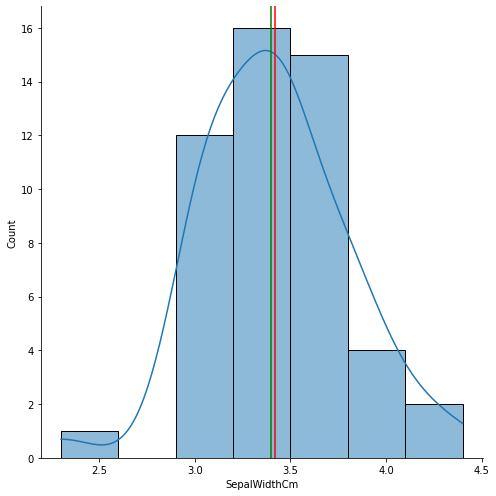

In [10]:
'''
SepalWidthCm ranges from 2.3 to 4.4 for iris setosa 
so 7 bins of width 0.3
the distribution is a little positively skewed .i.e. mode<median<mean
'''
sb.displot(data=setosa,x=setosa.SepalWidthCm,height=7,bins=7,kde=True)
plt.axvline(x=setosa.SepalWidthCm.mean(),
            color='red')
plt.axvline(x=setosa.SepalWidthCm.median(),
            color='green')

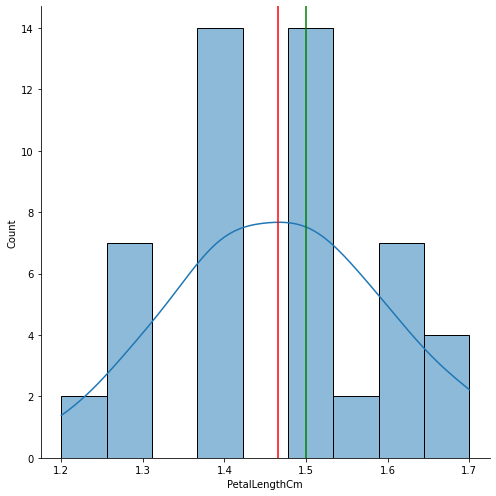

In [11]:
'''
PetalLengthCm ranges from 1 to 1.9 for iris setosa 
so 9 bins of width 0.1
the distribution is negatively skewed .i.e. mean < median < mode
'''
sb.displot(data=setosa,x=setosa.PetalLengthCm,height=7,bins=9,kde=True)
plt.axvline(x=setosa.PetalLengthCm.mean(),
            color='red')
plt.axvline(x=setosa.PetalLengthCm.median(),
            color='green')

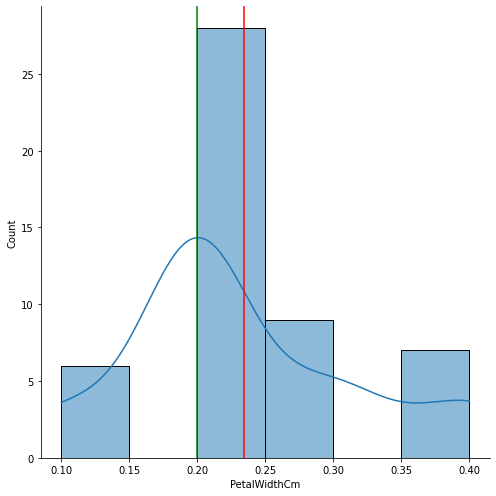

In [12]:
'''
PetalWidthCm ranges from 0.1 to 0.6 for iris setosa 
so 6 bins of width 0.1
the distribution is positively skewed .i.e. mean > median > mode
'''
sb.displot(data=setosa,x=setosa.PetalWidthCm,height=7,bins=6,kde=True)
plt.axvline(x=setosa.PetalWidthCm.mean(),
            color='red')
plt.axvline(x=setosa.PetalWidthCm.median(),
            color='green')

In [13]:
versicolor.describe()
# ***************Iris-versicolor***************

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.280000,1.326000
std,14.57738,0.516171,0.313798,0.435187,0.197753
min,51.00000,4.900000,2.000000,3.300000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


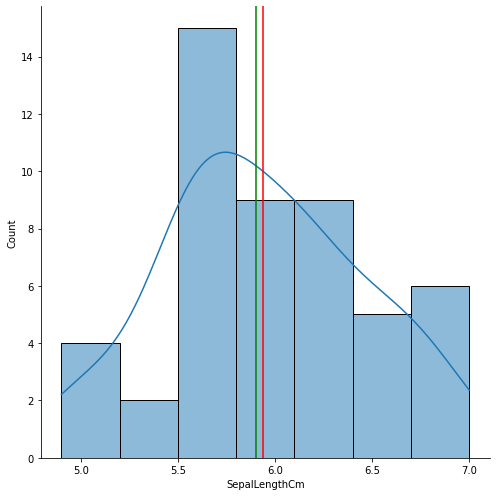

In [14]:
'''
SepalLengthCm ranges from 4.9 to 7.0 for iris versicolor
so 7 bins of width 0.3
the distribution is positively skewed as mode<median<mean
'''
sb.displot(data=versicolor,x=versicolor.SepalLengthCm,height=7,bins=7,kde=True)
plt.axvline(x=versicolor.SepalLengthCm.mean(),
            color='red')
plt.axvline(x=versicolor.SepalLengthCm.median(),
            color='green')

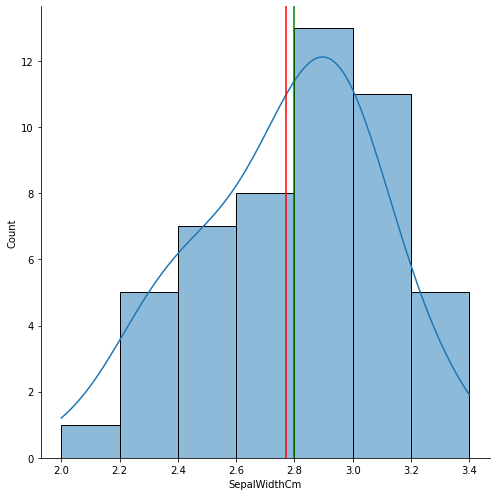

In [15]:
'''
SepalWidthCm ranges from 2.0 to 3.4 for iris versicolor 
so 7 bins of width 0.2
the distribution is negatively skewed .i.e. mode>median>mean
'''
sb.displot(data=versicolor,x=versicolor.SepalWidthCm,height=7,bins=7,kde=True)
plt.axvline(x=versicolor.SepalWidthCm.mean(),
            color='red')
plt.axvline(x=versicolor.SepalWidthCm.median(),
            color='green')

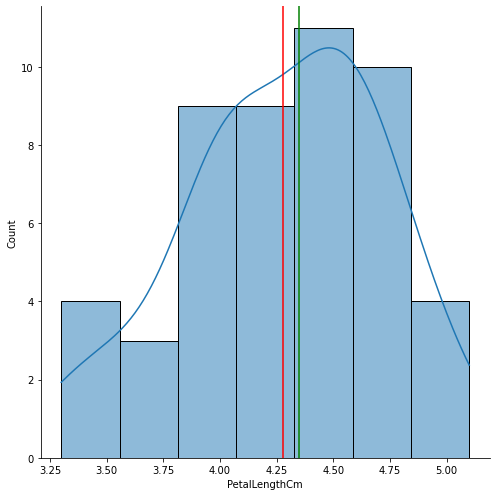

In [16]:
'''
PetalLengthCm ranges from 3.0 to 5.1 for iris versicolor 
so 7 bins of width 0.3
the distribution is negatively skewed .i.e. mode>median>mean
'''
sb.displot(data=versicolor,x=versicolor.PetalLengthCm,height=7,bins=7,kde=True)
plt.axvline(x=versicolor.PetalLengthCm.mean(),
            color='red')
plt.axvline(x=versicolor.PetalLengthCm.median(),
            color='green')

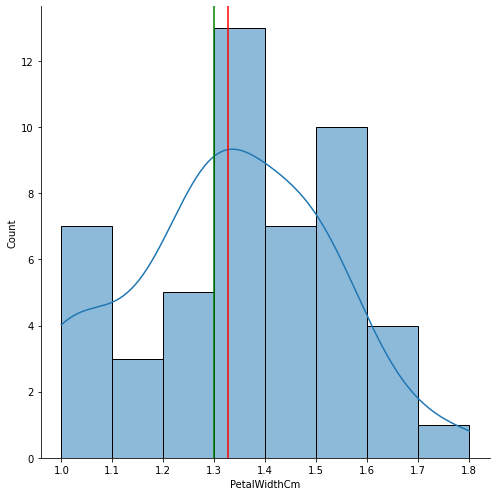

In [17]:
'''
PetalWidthCm ranges from 1.0 to 1.8 for iris versicolor 
so 8 bins of width 0.1
the distribution is positively skewed .i.e. mode<median<mean
'''
sb.displot(data=versicolor,x=versicolor.PetalWidthCm,height=7,bins=8,kde=True)
plt.axvline(x=versicolor.PetalWidthCm.mean(),
            color='red')
plt.axvline(x=versicolor.PetalWidthCm.median(),
            color='green')

In [18]:
virginica.describe()
#  ***************Iris-virginica*********

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.00000
mean,125.50000,6.614500,2.961000,5.552000,2.02600
std,14.57738,0.590056,0.256952,0.551895,0.27465
min,101.00000,5.600000,2.500000,4.500000,1.40000
25%,113.25000,6.243750,2.800000,5.100000,1.80000
50%,125.50000,6.500000,3.000000,5.550000,2.00000
75%,137.75000,6.900000,3.156250,5.875000,2.30000
max,150.00000,7.900000,3.600000,6.900000,2.50000


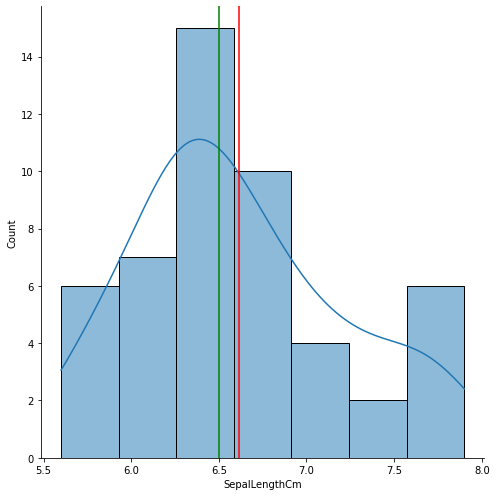

In [19]:
'''
SepalLengthCm ranges from 4.9 to 7.9 for iris virginica
so 10 bins of width 0.3
the distribution is positively skewed as mode<median<mean
'''
sb.displot(data=virginica,x=virginica.SepalLengthCm,height=7,bins=7,kde=True)
plt.axvline(x=virginica.SepalLengthCm.mean(),
            color='red')
plt.axvline(x=virginica.SepalLengthCm.median(),
            color='green')

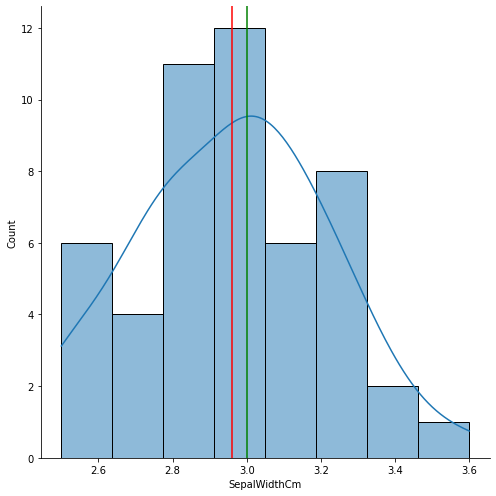

In [20]:
'''
SepalWidthCm ranges from 2.2 to 3.8 for iris virginica
so 8 bins of width 0.2
the distribution is a little negatively skewed as mode>median>mean
'''
sb.displot(data=virginica,x=virginica.SepalWidthCm,height=7,bins=8,kde=True)
plt.axvline(x=virginica.SepalWidthCm.mean(),
            color='red')
plt.axvline(x=virginica.SepalWidthCm.median(),
            color='green')

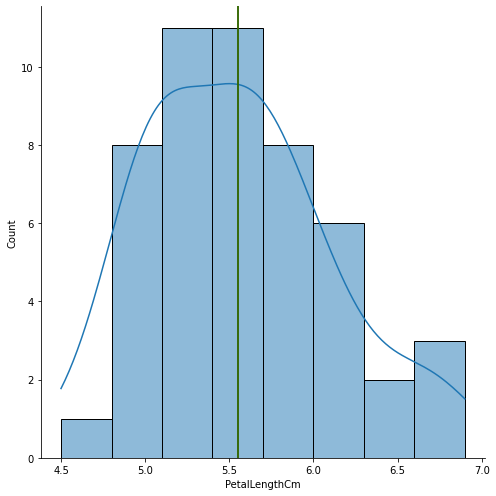

In [21]:
'''
PetalLengthCm ranges from 4.5 to 6.9 for iris virginica
so 8 bins of width 0.3
the distribution is normal as mode=median=mean
'''
sb.displot(data=virginica,x=virginica.PetalLengthCm,height=7,bins=8,kde=True)
plt.axvline(x=virginica.PetalLengthCm.mean(),
            color='red')
plt.axvline(x=virginica.PetalLengthCm.median(),
            color='green')

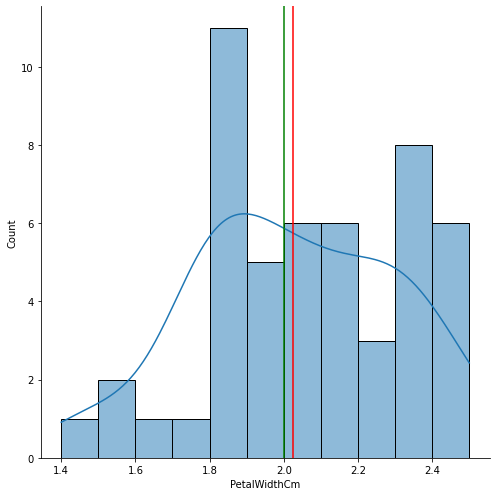

In [29]:
'''
PetalWidthCm ranges from 1.4 to 2.5 for iris virginica
so 11 bins of width 0.1
the distribution is positively skewed as mode<median<mean
'''
sb.displot(data=virginica,x=virginica.PetalWidthCm,height=7,bins=11,kde=True)
plt.axvline(x=virginica.PetalWidthCm.mean(),
            color='red')
plt.axvline(x=virginica.PetalWidthCm.median(),
            color='green')

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

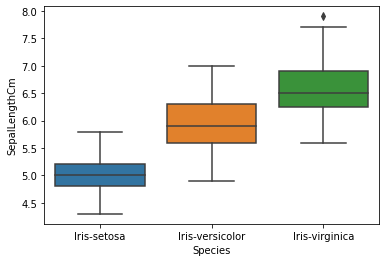

In [23]:
sb.boxplot(data=df2,x='Species',y='SepalLengthCm')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

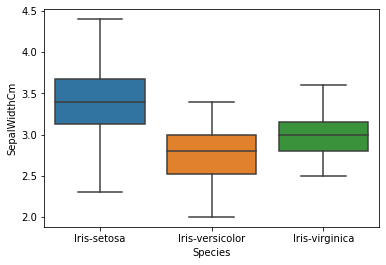

In [24]:
sb.boxplot(data=df2,x='Species',y='SepalWidthCm')

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

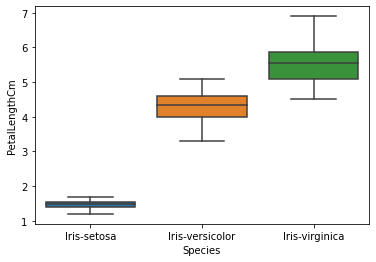

In [25]:
sb.boxplot(data=df2,x='Species',y='PetalLengthCm')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

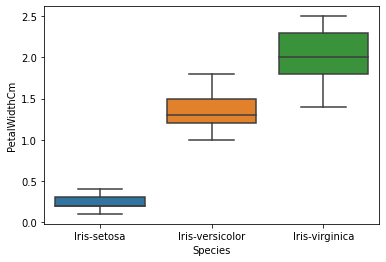

In [26]:
sb.boxplot(data=df2,x='Species',y='PetalWidthCm')

In [27]:
# Findings:
# Avg values of Iris-setosa is more only in sepalwidth in comparison to other varities,
# Although Avg sepalLW of versicolor > virginica, the avg petalLW of versicolor < virginica,

# based on std dev,
# setosa has lesser value than others in 
# sepal length, petal width, petal length
# meaning most of them are near mean length

# similarly: versicolor for sepal width

# samples taken for virginica have most variation 
# in the measured characteristics
# Some amount of outliers are present in virginica for SepalLW
# in setosa for PetalLW
# in versicolor for PetalL